## california data (linear regression data)

In [29]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## dataframe of california dataset

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1, random_state=231)

## forward selection of features & r2/r2adj score

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector

r2_list_tr = [] # train set의 r2 score 저장
r2adj_list_tr = [] # train set의 adjusted r2 score 저장

r2_list_te = [] # test set의 r2 score 저장
r2adj_list_te = [] # test set의 adjusted r2 score 저장 

n_feature = [1, 2, 3, 4] # 사용해볼 feature 개수 list

for i in n_feature:
    linreg = LinearRegression(fit_intercept=True)
    fs = SequentialFeatureSelector(linreg, k_features= i,
                                  forward=True,
                                  floating=False,
                                  verbose=2,
                                  scoring='r2')
    fs.fit(x_train, y_train)
    feat_cols = list(fs.k_feature_idx_) # 선택된 feature들의 index를 list화
    n_tr = len(x_train) # train set 샘플 수
    n_te = len(x_test) # test set 샘플 수
    p = fs.k_features # 선택된 feature 수
    
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(x_train[:, feat_cols], y_train) # 선택된 feature의 값들로만 학습
    y_pred_tr = linreg.predict(x_train[:, feat_cols]) # 학습 데이터들의 예측값
    y_pred_te = linreg.predict(x_test[:, feat_cols]) # test 데이터들의 예측값
    
    R2_tr = r2_score(y_train, y_pred_tr)
    R2_adj_tr = 1-((1-R2_tr)*(n_tr-1)/(n_tr-p-1)) # R2 score를 이용해 Adjusted R2 score계산

    R2_te = r2_score(y_test, y_pred_te)
    R2_adj_te = 1-((1-R2_te)*(n_te-1)/(n_te-p-1)) # R2 score를 이용해 Adjusted R2 score계산
    
    r2_list_tr.append(R2_tr)
    r2adj_list_tr.append(R2_adj_tr)
    r2_list_te.append(R2_te)
    r2adj_list_te.append(R2_adj_te)
    
    print("selected features : {}".format(feat_cols))
    print("*************************training set*************************")
    print("r2_score of training set on selected features          : %.5f" %R2_tr)
    print("adjusted r2_score of training set on selected features : %.5f" %R2_adj_tr)
    print("")
    print("***************************test set***************************")
    print("r2_score of test set on selected features              : %.5f" %R2_te)
    print("adjusted r2_score of test set on selected features     : %.5f" %R2_adj_te)

    print("accuracy of the model : {:.5f}".format(linreg.score(x_test[:, feat_cols], y_test))) # 모델 성능 출력
    print("")
    


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-05-03 12:33:21] Features: 1/1 -- score: 0.4718560418900438[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


selected features : [0]
*************************training set*************************
r2_score of training set on selected features          : 0.47223
adjusted r2_score of training set on selected features : 0.47220

***************************test set***************************
r2_score of test set on selected features              : 0.48422
adjusted r2_score of test set on selected features     : 0.48397
accuracy of the model : 0.48422



[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-05-03 12:33:21] Features: 1/2 -- score: 0.4718560418900438[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-05-03 12:33:21] Features: 2/2 -- score: 0.5072874482901697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


selected features : [0, 1]
*************************training set*************************
r2_score of training set on selected features          : 0.50761
adjusted r2_score of training set on selected features : 0.50756

***************************test set***************************
r2_score of test set on selected features              : 0.52248
adjusted r2_score of test set on selected features     : 0.52202
accuracy of the model : 0.52248



[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-05-03 12:33:21] Features: 1/3 -- score: 0.4718560418900438[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-05-03 12:33:21] Features: 2/3 -- score: 0.5072874482901697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2020-05-03 12:33:22] Features: 3/3 -- score: 0.5152080886349587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2020-05-03 12:33:22] Features: 1/4 -- sc

selected features : [0, 1, 6]
*************************training set*************************
r2_score of training set on selected features          : 0.51566
adjusted r2_score of training set on selected features : 0.51558

***************************test set***************************
r2_score of test set on selected features              : 0.53080
adjusted r2_score of test set on selected features     : 0.53012
accuracy of the model : 0.53080



[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-05-03 12:33:22] Features: 2/4 -- score: 0.5072874482901697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2020-05-03 12:33:22] Features: 3/4 -- score: 0.5152080886349587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


selected features : [0, 1, 6, 7]
*************************training set*************************
r2_score of training set on selected features          : 0.59264
adjusted r2_score of training set on selected features : 0.59255

***************************test set***************************
r2_score of test set on selected features              : 0.60630
adjusted r2_score of test set on selected features     : 0.60554
accuracy of the model : 0.60630



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2020-05-03 12:33:22] Features: 4/4 -- score: 0.592275875302952

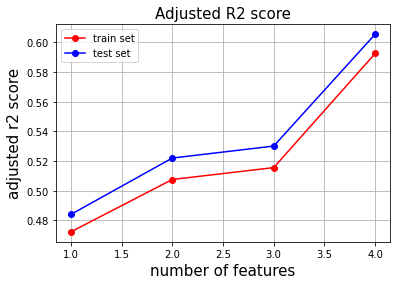

In [22]:
import matplotlib.pyplot as plt

plt.grid(b=True, which='major', axis='both')
plt.title("Adjusted R2 score", size = 15)
plt.xlabel("number of features", size = 15)
plt.ylabel("adjusted r2 score", size = 15)
plt.plot(n_feature, r2adj_list_tr, c='r', marker='o', label='train set')
plt.plot(n_feature, r2adj_list_te, c='b', marker='o', label='test set')
plt.legend()
plt.show()

In [23]:
df_r2 = pd.DataFrame(data = [r2_list_tr, r2adj_list_tr, r2_list_te, r2adj_list_te])
df_r2.index = ['r2(train)', 'r2adj(train)', 'r2(test)', 'r2adj(test)']
df_r2.columns = ['0', '0, 1', '0, 1, 6', '0, 1, 6, 7']
df_r2

,0,"0, 1","0, 1, 6","0, 1, 6, 7"
r2(train),0.472233,0.507612,0.515657,0.592638
r2adj(train),0.472205,0.507559,0.515579,0.592550
r2(test),0.484218,0.522481,0.530801,0.606300
r2adj(test),0.483968,0.522018,0.530118,0.605535


## grid search to find best lasso model

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

model = Lasso()
# Lasso regression 모델에 사용해볼 parameter들
param_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100],
              'fit_intercept':[True, False],
             'normalize':[True, False],
              'max_iter': [100, 500, 1000]}
lasso_gird = GridSearchCV(model, param_grid, cv=5)
lasso_gird.fit(x_train, y_train)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908.9414743247412, tolerance: 1.970174980677532
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760.8396835512231, tolerance: 1.9942722008638525
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717.7813067298839, tolerance: 1.9892299852523958
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\l

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4461.73991716501, tolerance: 8.395467542906992
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4536.90950072749, tolerance: 8.326679667207012
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4401.513836415074, tolerance: 8.346016382407
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\pr

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4498.461140819, tolerance: 8.326679667207012
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4355.882837824263, tolerance: 8.346016382407
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4404.459733673081, tolerance: 8.297198203306682
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\pro

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4584.538734158572, tolerance: 8.322296937806762
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4558.112128346992, tolerance: 8.395467542906992
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4593.727527324496, tolerance: 8.326679667207012
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\loc

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319.4027791068793, tolerance: 8.395467542906992
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1472.5749696596013, tolerance: 8.326679667207012
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1283.2851203059536, tolerance: 8.346016382407
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\loc

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.07521777911006, tolerance: 8.326679667207012
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.65159315794972, tolerance: 8.346016382407
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.9304318997947, tolerance: 8.297198203306682
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\loca

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
print("best parameters : {}".format(lasso_gird.best_params_))

best parameters : {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100, 'normalize': False}


In [27]:
lasso = lasso_gird.best_estimator_.fit(x_train, y_train)
print("accuarcy : {:.5f}".format(lasso.score(x_test, y_test)))
print("r2 score : {:.5f}".format(r2_score(y_test, lasso.predict(x_test))))

accuarcy : 0.61850
r2 score : 0.61850


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.251198256628413, tolerance: 2.470066754542557
  model = cd_fast.enet_coordinate_descent(


In [30]:
# lasso에 의해 실제로 coefficient의 값이 0이 되는지 확인하기 위함

alpha_set = [0.0001, 0.001, 0.01, 0.1, 1, 100]

df_la = pd.DataFrame()
df_la['Feature Name'] = california.feature_names
for a in alpha_set:

    lasso = Lasso(alpha=a, max_iter=100, fit_intercept=True, normalize=False).fit(x_train, y_train)
    
    column_name = 'alpha = %g' %a
    df_la[column_name] = lasso.coef_
df_la

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899.3137487654467, tolerance: 2.470066754542557
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.251198256628413, tolerance: 2.470066754542557
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9377391806319793, tolerance: 2.470066754542557
  model = cd_fast.enet_coordinate_descent(


,Feature Name,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 100
0,MedInc,0.435160,0.431886,0.399142,0.389868,0.144431,0.0
1,HouseAge,0.009311,0.009372,0.009981,0.014958,0.005778,0.0
2,AveRooms,-0.105883,-0.099576,-0.036506,-0.000000,0.000000,0.0
3,AveBedrms,0.635502,0.602633,0.273939,0.000000,-0.000000,-0.0
4,Population,-0.000005,-0.000004,-0.000002,0.000017,-0.000006,-0.0
5,AveOccup,-0.003591,-0.003578,-0.003447,-0.003206,-0.000000,-0.0
6,Latitude,-0.420810,-0.419732,-0.408953,-0.114449,-0.000000,-0.0
7,Longitude,-0.433917,-0.432327,-0.416424,-0.099503,-0.000000,-0.0


## Logistic regrssion 용 데이터

In [31]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

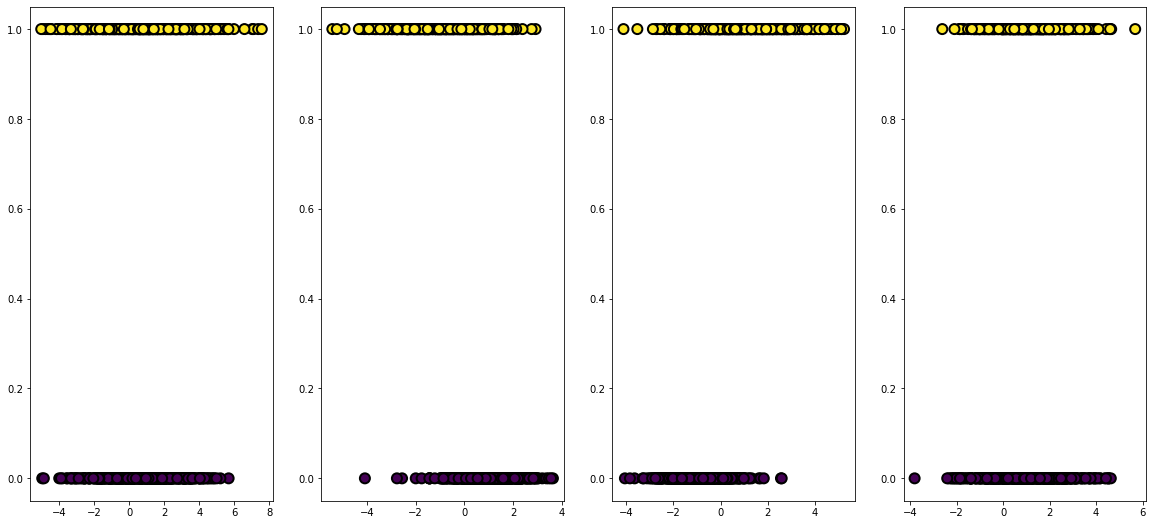

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

## 주어진 logistic regression용 데이터의 data frame 생성

In [39]:
import pandas as pd
import numpy as np
cols = ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']
df = pd.DataFrame(data= X, columns=cols)
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,2.448869,0.987961,-0.392408,2.514684,0.347317,-0.002573,-1.587549,-0.124382
1,-0.697755,2.362562,-2.468210,1.174576,-1.265119,-2.380121,-0.938171,-1.090520
2,-0.639334,1.026700,-1.685357,-0.525362,-0.270319,-1.443203,-1.164062,-1.133899
3,3.004434,-1.385521,1.878130,2.235000,2.789373,0.250126,0.318288,1.115634
4,-0.597722,-1.653486,-0.074091,0.527735,-1.426407,1.693533,1.706594,0.087431
...,...,...,...,...,...,...,...,...
995,-1.111860,0.924308,0.707488,0.422264,-2.198669,1.054842,1.362627,1.018958
996,0.599167,0.789932,-1.272645,1.446781,-0.049581,-1.170442,-0.676135,-0.614608
997,-1.471838,-0.478831,0.342600,0.191772,-2.402739,1.670929,2.042493,0.641093
998,3.808383,-2.058003,2.374526,2.498742,4.112708,-0.019707,0.353089,1.287618


# feature들 간의 correlation coefficient

In [40]:
# feature 간의 상관관계 표현
dataCorr = df.corr()
dataCorr

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
feature0,1.000000,-0.478951,0.436902,0.864159,0.880861,-0.018816,-0.390682,0.215001
feature1,-0.478951,1.000000,-0.575351,-0.304146,-0.527124,-0.566431,-0.354715,-0.367063
feature2,0.436902,-0.575351,1.000000,0.403478,0.588714,0.290694,0.572638,0.948551
feature3,0.864159,-0.304146,0.403478,1.000000,0.670715,-0.029360,-0.212808,0.315153
feature4,0.880861,-0.527124,0.588714,0.670715,1.000000,-0.229822,-0.183234,0.371171
feature5,-0.018816,-0.566431,0.290694,-0.029360,-0.229822,1.000000,0.415417,0.242491
feature6,-0.390682,-0.354715,0.572638,-0.212808,-0.183234,0.415417,1.000000,0.707985
feature7,0.215001,-0.367063,0.948551,0.315153,0.371171,0.242491,0.707985,1.000000


In [41]:
# 높은 상관관계를 갖는 feature 추출
dataCorr = dataCorr[abs(dataCorr) >= 0.01].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]

dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
 
dataCorr.sort_values(by=[0], ascending=False).head(5)

,level_0,level_1,0
23,feature2,feature7,0.948551
4,feature0,feature4,0.880861
3,feature0,feature3,0.864159
55,feature6,feature7,0.707985
28,feature3,feature4,0.670715


# heatmap

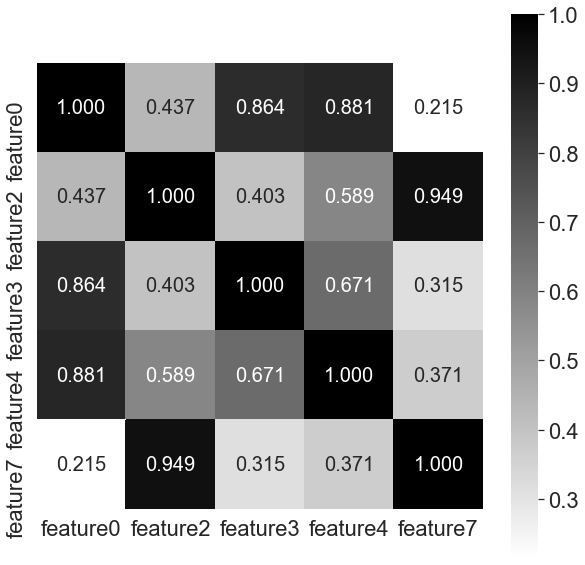

In [42]:
import seaborn as sns

cols = ['feature0', 'feature2', 'feature3', 'feature4', 'feature7' ]

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.3f', 
                 annot_kws={'size': 20},
                 cmap="binary",
                 yticklabels=cols, 
                 xticklabels=cols)
plt.show()

In [47]:
# 해당 feature값들만 고려한 데이터로 학습한 모델에서의 성능
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True)
logreg.fit(x_train[:,(0,2,3,4,7)], y_train)
acc = logreg.score(x_test[:, (0,2,3,4,7)], y_test)
print("accuracy : %f" %acc)

accuracy : 0.920000
